<h3>Центральна гранична теорема</h3>

Каже, що багато середніх вибірок з генеральної сукупності (ГС необов'язково мати нормальний розподіл) матимуть нормальний розподіл. Причому середня цього розподілу буде близько до середньої генеральної сукупності, а стандартне відхилення цього розподілу називатиметься стандартною помилкою середнього (se).

Знаючи стандартне відхилення ГС та розмір вибірки, ми можемо розрахувати стандартну помилку середнього.

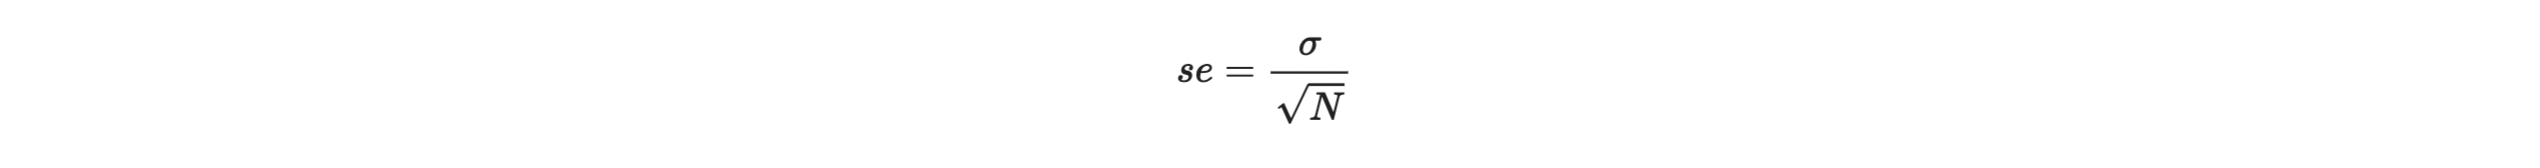

де N – розмір вибірки. Якщо розмір вибірки досить великий (>30) і є репрезативна, то замість стандартного відхилення ГС ми можемо взяти стандартне відхилення вибірки.

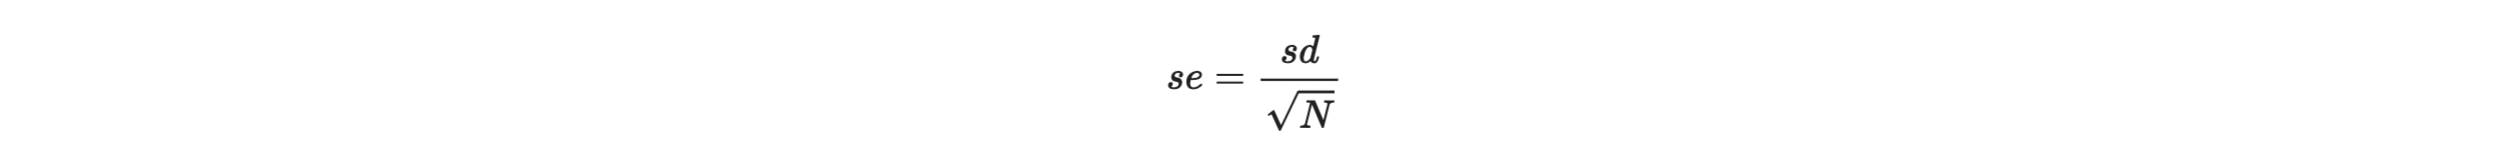

Стандартна помилка середнього – це середньоквадратичне відхилення розподілу вибіркових середніх

<h3>Приклади</h3>

Перевіримо практично всі ці закони.

<AxesSubplot:ylabel='Frequency'>

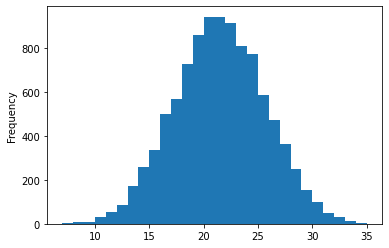

In [1]:
# Імпортування необхідних бібліотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Значення гральної кості
dice = [1, 2, 3, 4, 5, 6]

# Кількість кидків кості
count = 6

# Обсяг генеральної сукупності
sp_size = 10000

# sp - Statistical population - генеральна сукупність
sp = pd.Series(dtype=np.int64, index=range(sp_size))
for i in range(sp_size):
    value = 0 
    for _ in range(count):
        value += np.random.choice(dice)
    sp[i] = value
sp.plot.hist(bins=28)

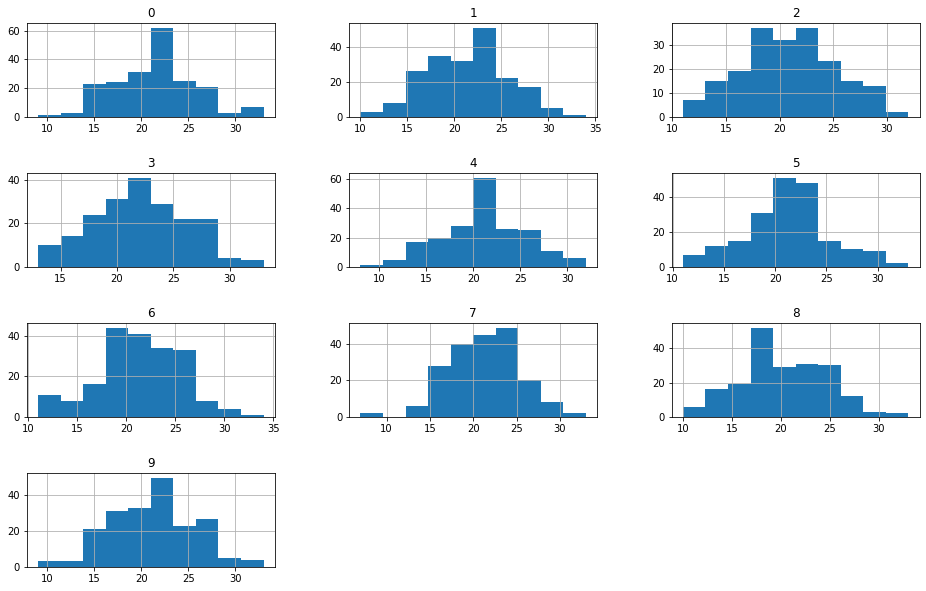

In [2]:
# кількість вибірок
samples_count = 10

# розмір вибірки
sample_size = 200
samples = pd.DataFrame([
    [np.random.choice(sp) for _ in range(sample_size)] for _ in range(samples_count)
]).T

samples.hist(figsize=(16, 10), sharex=0)
plt.subplots_adjust(hspace = 0.6)

In [6]:
means = samples.mean()
print('порівняємо середню ГС і середню середніх вибірок', sp.mean(), means.mean())
print('різниця:', abs(means.mean() - sp.mean()), ', стандартна помилка середнього:', means.std())

порівняємо середню ГС і середню середніх вибірок 20.9979 21.123
різниця: 0.12509999999999977 , стандартна помилка середнього: 0.37831644602545844


In [9]:
# Візьмемо довільну вибірку
sample = samples[0]
print('sample mean:', sample.mean())
print('sample SE:', sample.std()/np.sqrt(sample.size))

sample mean: 21.37
sample SE: 0.3008622449764365


<h3>PS Важливе зауваження щодо ЦПТ номер 2.</h3><br>
Мабуть найскладніший момент - це як ми так взяли та замінили стандартне відхилення генеральної сукупності на вибіркове. Ну і що з того, що у нас вибірка обсягом більше 30 спостережень, що за таке магічне число?

Все вірно, ніякої магії не відбувається. І незабаром ми в цьому остаточно розберемося. Як тільки пройдемо тему t – розподілу у другому модулі. Ось тут я докладно розписав, як нам треба розраховувати стандартну помилку середнього, якщо ми не знаємо стандартне відхилення в генеральній сукупності.